# Day 4
## Exercise 1

### List three different real networks and state the nodes and links for each of them:

- The water grid
    - Nodes: Each house and water supply
    - Edges: the water pipes
- Social networks
    - Nodes: each profile
    - Edges: The connection between the profiles
- The internet (WWW)
    - Nodes: webpages
    - Edges: Hyperlinks between the webpages



### Tell us of the network you are personally most interested in. Address the following questions:

We are interested in the social network Twitter.


## Exercise 2

In [3]:
#Tutorial from https://networkx.org/documentation/stable/tutorial.html
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph() # Creating the graph

In [ ]:
#Different ways to add nodes:
G.add_node(1) # one node
G.add_nodes_from([2, 3]) # from iterable
## (node, node_attribute_dict) With node attribute
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"}),])
## Adding nodes from others graph
H = nx.path_graph(10)
G.add_nodes_from(H) # This adds the nodes from H to the graph G
G.add_node(H) # Add the graph H as a node in G


In [ ]:
# Edges
## You can also just grow G, by adding edges
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)]) # Add several edges

In [ ]:
# Examining elements of a graph
list(G.nodes) # or list(G.edges)
list(G.adj[1])# or list(G.neighbors(1)) # finding the edges from the node 1. 
G.degree[1]  # the number of edges incident to 1

In [ ]:
# Removing elements from a graph
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

In [ ]:
# Using the graph constructors
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

In [ ]:
# Extra info about xnodes
## a node can be any hashable object (except None), not just int or strings, even though they are most common. 
## and an edge can be associated with any object x using G.add_edge(n1, n2, object=x)
# edges and nodes can be strings, this is pretty useful, but can lead to errors. 
#convert_node_labels_to_integers() # it is possible to convert labels to numbers in the graph. 

In [ ]:
# Accessing edges and neighbors
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
G[1][2]
G.edges[1, 2]
## It is also possible to get the info about the edges, with subscript
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

## Checking for several nodes with all their pairs with certain weights, IE. both 3 to 4 and 4 to 3 
FG = nx.Graph() #ini
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]) #ini
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")
##Checking only pairs with certain weights, but undirected. 
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

In [ ]:
# Adding attributes to graphs, nodes, and edges
## Graphs
G = nx.Graph(day="Friday")
G.graph['day'] = "Monday" # changing the attribute
#Node
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]['room'] = 714
G.nodes.data() # NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})
#Edges
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [3]:
# Directed graphs
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
#Accessing those weights
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))

H = nx.Graph(G)  # create an undirected graph H from a directed graph G

[2]

In [ ]:
# Multigraphs
## NetworkX provides classes for graphs which allow multiple edges between any pair of nodes
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

In [ ]:
# Analysing graphs
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)
# Some functions with large output iterate over (node, value) 2-tuples. These are easily stored in a dict structure if you desire.
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

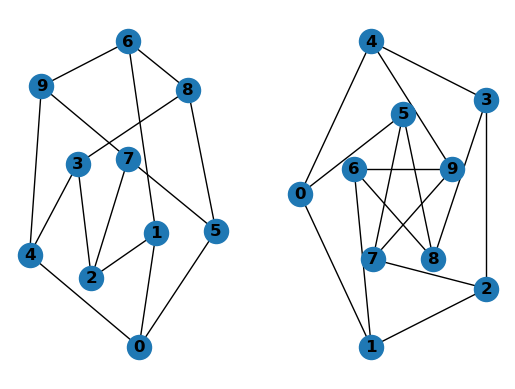

In [12]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


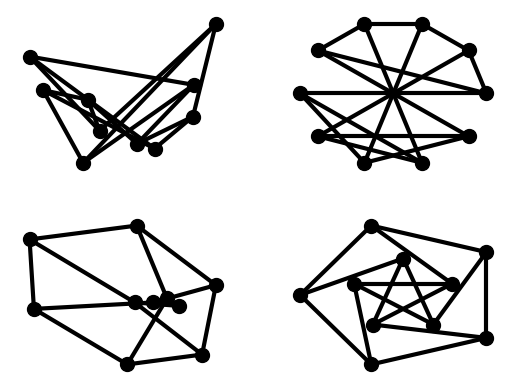

In [14]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

In [ ]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

In [ ]:
# To save drawings
#nx.draw(G)
#plt.savefig("path.png")

In [ ]:
"""
Other way to save graphs....

from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')"""

## Exercise 2.1

A can be drawn without visiting the same edge twice, and without lifting your pencil.
    - This is due to only two nodes have 3 edges(The end and start node. )
B cannot
    - Due to all nodes has 3 edges. 
C holds, because you can draw the outer triangle and inner triangle, and all nodes have even number of edges
D holds, because it only has 2 nodes with uneven number of edges. 


## Exercise 2.2(2.3 in the book)

In [43]:
#For making the linked_list later
def linked_list(graph):
    # Create a dictionary to store the linked list representation of the graph
    linked_list = {}

    # Iterate over the nodes in the graph
    for node in graph.nodes():
        # Get the neighbors of the current node
        neighbors = list(graph.neighbors(node))

        # Create a linked list for the current node
        head = None
        for neighbor in reversed(neighbors):
            new_node = {'Connected to': neighbor, 'next': head}
            head = new_node

        # Add the linked list to the dictionary
        linked_list[node] = head

    # Print the linked list representation of the graph
    for node, head in linked_list.items():
        print(f"Adjacency list of vertex {node}")
        while head:
            print(f" -> {head['Connected to']}", end="")
            head = head['next']
        print("\n")
    return linked_list

In [31]:
#Undirected graph 1
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 6), (1,2),(2,3),(2,4),(1,3),(1,4),(6,3)])
list(G.nodes)
G_Adj = nx.adjacency_matrix(G) #adj matrix
print(G_Adj.todense()) #adjacency matrix shown
G_linked_list = linked_list(G)  #linked list

clustering_coefficients = nx.clustering(G)# Calculate the clustering coefficient for each node
# Calculate the average clustering coefficient for the graph
avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print("Average clustering coefficient:", avg_clustering_coefficient)


[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
Average clustering coefficient: 0.6388888888888888


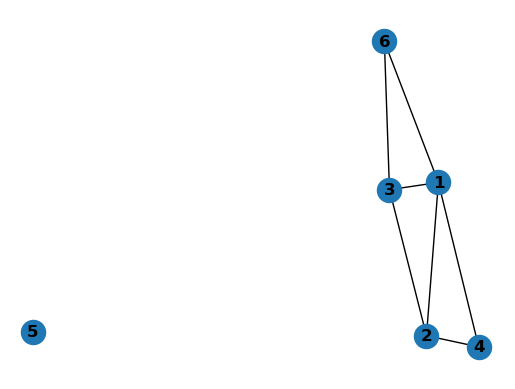

In [57]:
subax1 = plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')

In [19]:
# Directed graph
DG = nx.DiGraph()
DG.add_nodes_from([1,2,3,4,5,6])
DG.add_edges_from([(6,1), (1,2),(2,3),(2,4),(3,2),(4,1),(6,3),(3,1),(3,2)])
DG_Adj = nx.adjacency_matrix(G) #adjacency matrix
DG_linked_list = linked_list(DG) #Linked List


{1: {'val': 2, 'next': None}, 2: {'val': 3, 'next': {'val': 4, 'next': None}}, 3: {'val': 2, 'next': {'val': 1, 'next': None}}, 4: {'val': 1, 'next': None}, 5: None, 6: {'val': 1, 'next': {'val': 3, 'next': None}}}


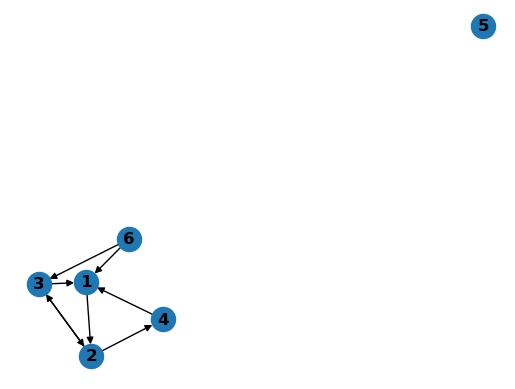

In [68]:
subax1 = plt.plot()
nx.draw(DG, with_labels=True, font_weight='bold')

In [44]:
#Switching the labels of 5 and 6
G_switched = nx.Graph()
G_switched.add_nodes_from([1,2,3,4,5,6])
G_switched.add_edges_from([(1, 5), (1,2),(2,3),(2,4),(1,3),(1,4),(5,3)])
#list(G_switched.nodes)
G_Adj_switched = nx.adjacency_matrix(G_switched) #adj matrix
print(G_Adj.todense())
print("switched matrix")
print(G_Adj_switched.todense())
print("The last two rows of the matrix switches, since now 5 has 2 connections and 6 has none.")

print("linked list")
print("old linked list")
G_linked_list = linked_list(G) 
#print(G_linked_list)
print("switched linked list")
G_linked_list_switched = linked_list(G_switched) 
#print(G_linked_list_switched)
print("The only change is that 5 and 6 is switched?")

print("You can infer more from the matrix, and it gets a better overview of the whole network, and not only the individual edges")
print("")


[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
switched matrix
[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
The last two rows of the matrix switches, since now 5 has 2 connections and 6 has none.
linked list
old linked list
Adjacency list of vertex 1
 -> 6 -> 2 -> 3 -> 4

Adjacency list of vertex 2
 -> 1 -> 3 -> 4

Adjacency list of vertex 3
 -> 2 -> 1 -> 6

Adjacency list of vertex 4
 -> 2 -> 1

Adjacency list of vertex 5


Adjacency list of vertex 6
 -> 1 -> 3

switched linked list
Adjacency list of vertex 1
 -> 5 -> 2 -> 3 -> 4

Adjacency list of vertex 2
 -> 1 -> 3 -> 4

Adjacency list of vertex 3
 -> 2 -> 1 -> 5

Adjacency list of vertex 4
 -> 2 -> 1

Adjacency list of vertex 5
 -> 1 -> 3

Adjacency list of vertex 6


The only change is that 5 and 6 is switched?


In [46]:
import numpy as np
# Compute the matrix product of the adjacency matrix with itself twice
length_3_paths = np.linalg.matrix_power(G, 3)

# Extract the number of paths from node 1 to node 3 of length 3
num_paths = length_3_paths[1, 6]

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional